In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/proccessed.csv", index_col=0)
df.head()

,id,party_name,descriptions,gender,is_foreigner,location,descr_procc,descr_stemmed_l,descr_stemmed_a
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,554456,"['hasič', 'všeruby', '(domažlice)', 'ex-zastup...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['potravinářský', 'komora', 'český', 'republik...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb..."
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umělec', 'dirigent']","['umělec', 'dirigent']","['uměl', 'dirigen']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umělec', 'básnířka']","['umělec', 'básnířk']","['uměl', 'básn']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,0,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v..."


In [3]:
df.drop(columns=['location'], inplace=True)
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"['hasič', 'všeruby', '(domažlice)', 'ex-zastup...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"['potravinářský', 'komora', 'český', 'republik...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb..."
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"['umělec', 'dirigent']","['umělec', 'dirigent']","['uměl', 'dirigen']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"['umělec', 'básnířka']","['umělec', 'básnířk']","['uměl', 'básn']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v..."


In [4]:
df['is_pol'] = df.party_name.apply(lambda x: x != 'BEZPP')

In [5]:
from src.utils import to_bag_of_words
bag_of_words = to_bag_of_words(df.descr_procc)
bag_of_words_l = to_bag_of_words(df.descr_stemmed_l)
bag_of_words_a = to_bag_of_words(df.descr_stemmed_a)
bag_of_words.head()

,aaa,aaabyty,aag,aakrchitektura,aalborg,aarhus,ab,abatyše,abb,abc,...,žďár,žďárce,žďárku,žďársko,žďársku,žďárský,žďáře,žš,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bag_of_words_l.head()

,aaa,aaabyt,aag,aakrchitektur,aalborg,aarh,ab,abatyš,abb,abc,...,žížal,žďas,žďánic,žďár,žďárk,žďársk,žďář,žš,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
bag_of_words_a.head()

,aaa,aaaby,aag,aakrchitektur,aalborg,aarh,ab,abatyš,abb,abc,...,žít,žíža,žďas,žďán,žďár,žďárs,žďář,žš,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
bag_of_words.loc[:,bag_of_words.sum() > 1]

,aaa,ab,abb,abc,abertamy,abloy,abs,absl,absolvent,absolventka,...,žákava,žákovou,žár,žít,žďár,žďársko,žďársku,žďárský,žďáře,žš
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bag_of_words_a.loc[:, bag_of_words_a.sum() > 1]

,aaa,ab,abb,abc,abertam,ablo,abs,absolven,abu,ac,...,žurná,žáb,žák,žákav,žár,žít,žďár,žďárs,žďář,žš
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from src.utils import string_to_list
df.descr_procc = df.descr_procc.apply(string_to_list)
df['desc_count_ori'] = df.descriptions.apply(lambda x: len(x.split(";")))
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",True,5
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb...",False,3
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"[umělec, dirigent]","['umělec', 'dirigent']","['uměl', 'dirigen']",False,2
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"[umělec, básnířka]","['umělec', 'básnířk']","['uměl', 'básn']",False,2
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v...",False,3


In [11]:
df['desc_count'] = df.descr_procc.apply(lambda x: len(x))
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori,desc_count
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",True,5,10
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb...",False,3,6
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"[umělec, dirigent]","['umělec', 'dirigent']","['uměl', 'dirigen']",False,2,2
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"[umělec, básnířka]","['umělec', 'básnířk']","['uměl', 'básn']",False,2,2
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v...",False,3,6


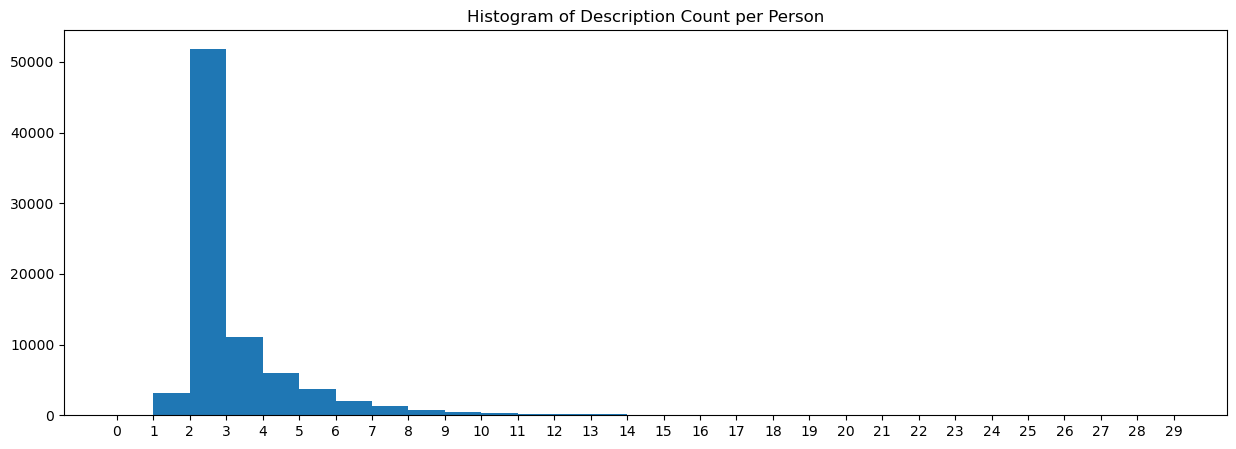

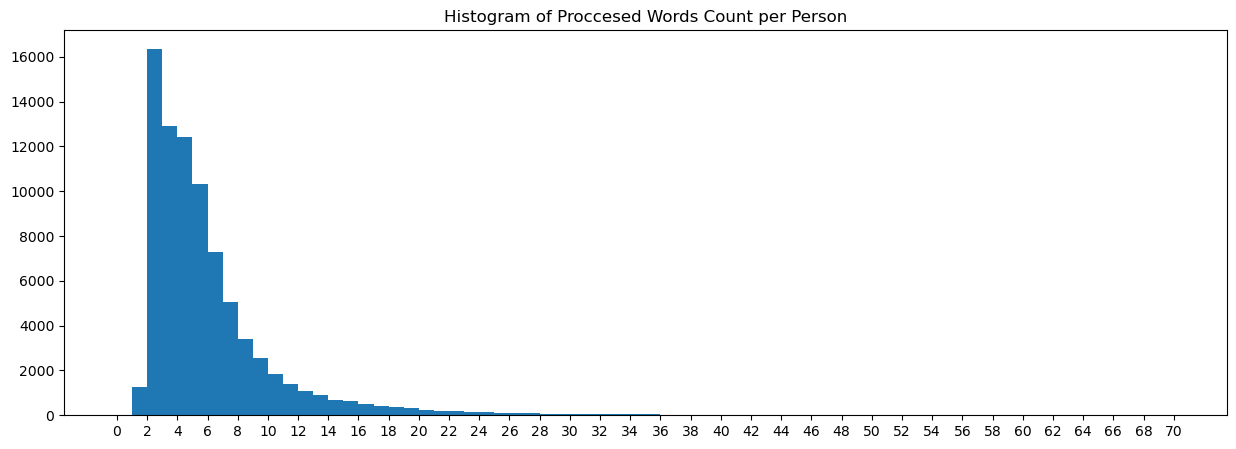

In [12]:
def histogram(column: pd.Series, title: str = ""):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(column, bins=range(0, max(column) + 1))
    ax.set_xticks(range(0, max(column) + 1, int(max(max(column)/30, 1))))
    ax.set_title("Histogram of " + title)
    plt.show()
histogram(df.desc_count_ori, "Description Count per Person")
histogram(df.desc_count, "Proccesed Words Count per Person")

In [13]:
std = ['advokát', 'akademik', 'aktivista', 'blogger', 'byznys', 
'celebrita', 'církev', 'europol', 'komentátor', 'kontrolor', 
'kultura', 'léčitel', 'lobby', 'zdravotník', 'mluvčí', 'ngo', 
'novinář', 'odborník', 'odbory', 'ostatní', 'ombudsman', 
'ozbrojenec', 'politik', 'social', 'soudce', 'soudce_us', 
'spolek', 'sport', 'starosta', 'stát_byznys', 'ttank', 
'umělec', 'úředník', 'vyslanec', 'zaměstnavatel', 'zástupce', 
'záchranář', 'média', 'mezinárodní']


In [14]:
for label in std:
    df[label] = df.descr_procc.apply(lambda x: label in x)
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori,...,stát_byznys,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",True,5,...,False,False,False,False,False,False,False,False,False,False
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb...",False,3,...,False,False,False,False,False,False,False,False,False,False
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"[umělec, dirigent]","['umělec', 'dirigent']","['uměl', 'dirigen']",False,2,...,False,False,True,False,False,False,False,False,False,False
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"[umělec, básnířka]","['umělec', 'básnířk']","['uměl', 'básn']",False,2,...,False,False,True,False,False,False,False,False,False,False
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v...",False,3,...,False,False,True,False,False,False,False,False,False,False


In [15]:
df.replace(to_replace={True:1, False:0}, inplace=True)
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori,...,stát_byznys,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",1,5,...,0,0,0,0,0,0,0,0,0,0
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb...",0,3,...,0,0,0,0,0,0,0,0,0,0
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"[umělec, dirigent]","['umělec', 'dirigent']","['uměl', 'dirigen']",0,2,...,0,0,1,0,0,0,0,0,0,0
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"[umělec, básnířka]","['umělec', 'básnířk']","['uměl', 'básn']",0,2,...,0,0,1,0,0,0,0,0,0,0
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v...",0,3,...,0,0,1,0,0,0,0,0,0,0


In [16]:
df['is_labeled'] = df.descr_procc.apply(lambda x: len([i for i in x if i in std]) != 0)
df.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori,...,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní,is_labeled
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",1,5,...,0,0,0,0,0,0,0,0,0,False
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...","['potravinářsk', 'komor', 'česk', 'republik', ...","['potravinářs', 'komor', 'čes', 'repub', 'lobb...",0,3,...,0,0,0,0,0,0,0,0,0,True
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,"[umělec, dirigent]","['umělec', 'dirigent']","['uměl', 'dirigen']",0,2,...,0,1,0,0,0,0,0,0,0,True
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,"[umělec, básnířka]","['umělec', 'básnířk']","['uměl', 'básn']",0,2,...,0,1,0,0,0,0,0,0,0,True
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...","['mluvč', 'rožn', 'radhoštěm', 'umělec', 'graf...","['mluv', 'rož', 'radhoštěm', 'uměl', 'gra', 'v...",0,3,...,0,1,0,0,0,0,0,0,0,True


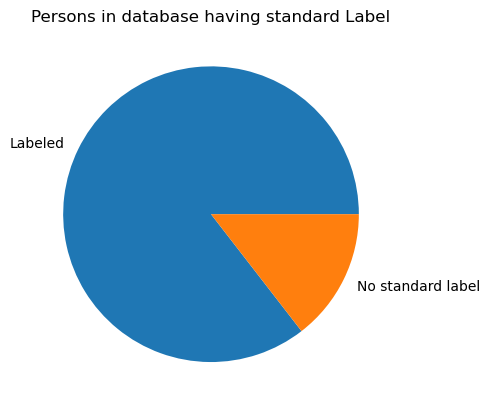

In [17]:
labels = 'Labeled', 'No standard label'
total_size = len(df.index)
labeled_size = df.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database having standard Label")
plt.show()

In [18]:
unlabeled = df[df.is_labeled == False]
unlabeled.head()

,id,party_name,descriptions,gender,is_foreigner,descr_procc,descr_stemmed_l,descr_stemmed_a,is_pol,desc_count_ori,...,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní,is_labeled
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...","['hasič', 'všerub', '(domažlice)', 'ex-zastupi...","['hasi', 'všerub', '(domažlice)', 'ex-zastupit...",1,5,...,0,0,0,0,0,0,0,0,0,False
20,001ed996-ecd8-4957-8723-b74f5667df44,BEZPP,REG_ZPR (#4624);deník Pravda,2,2,"[reg, zpr, deník, pravda]","['reg', 'zpr', 'deník', 'pravd']","['reg', 'zpr', 'den', 'pravd']",0,2,...,0,0,0,0,0,0,0,0,0,False
47,003f23c9-213d-4fe7-8052-8a0bc6f81227,APB,živnostník;kand_posl_2021,1,2,"[živnostník, kandidát, poslanec]","['živnostník', 'kandidát', 'poslanec']","['živnost', 'kandidá', 'poslan']",1,2,...,0,0,0,0,0,0,0,0,0,False
53,0046f8d6-f3ae-40dc-9d87-631562565c27,BEZPP,"nvinář;publicistka, redaktorka Katolického týd...",2,2,"[nvinář, publicistka, redaktorka, katolický, t...","['nvinář', 'publicistk', 'redaktork', 'katolic...","['nvin', 'publik', 'redaktor', 'katol', 'týd']",0,2,...,0,0,0,0,0,0,0,0,0,False
62,0052ae07-d0c4-452f-8821-0551701c7364,NEZ,"Postoloprty;vedoucí prodejny elektro, zastupit...",1,2,"[postoloprty, vedoucí, prodejna, elektro, zast...","['postoloprt', 'vedouc', 'prodejn', 'elektr', ...","['postolopr', 'vedou', 'prodej', 'elektr', 'za...",1,5,...,0,0,0,0,0,0,0,0,0,False


In [19]:
bag_of_words.loc[:, bag_of_words.sum() == 1]

,aaabyty,aag,aakrchitektura,aalborg,aarhus,abatyše,abcd,abeceda,abf,ablonného,...,žálobce,žáravice,žítkové,žížala,žďas,žďánic,žďárce,žďárku,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bag_of_words.loc[bag_of_words.aakrchitektura == 1,:]


,aaa,aaabyty,aag,aakrchitektura,aalborg,aarhus,ab,abatyše,abb,abc,...,žďár,žďárce,žďárku,žďársko,žďársku,žďárský,žďáře,žš,žžm,ˇyďár
3119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pd.set_option('display.max_colwidth', None)
df.iloc[3119,:]

id                                                                                                    127649a7-219e-4996-972a-f8df395daa69
party_name                                                                                                                           BEZPP
descriptions                       projektová manažerka Zlínského architektonického manuálu a členka spolku aAkrchitektura;odborník;spolek
gender                                                                                                                                   2
is_foreigner                                                                                                                             2
descr_procc                    [projektový, manažerka, zlínský, architektonický, manuál, členka, spolek, aakrchitektura, odborník, spolek]
descr_stemmed_l    ['projekt', 'manažerk', 'zlínsk', 'architektonick', 'manuál', 'členk', 'spolek', 'aakrchitektur', 'odborník', 'spolek']
descr_stemmed_a            

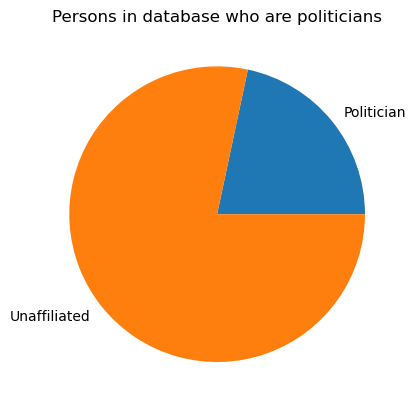

In [22]:
labels = 'Politician', 'Unaffiliated'
total_size = len(df.index)
labeled_size = df.is_pol.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database who are politicians")
plt.show()

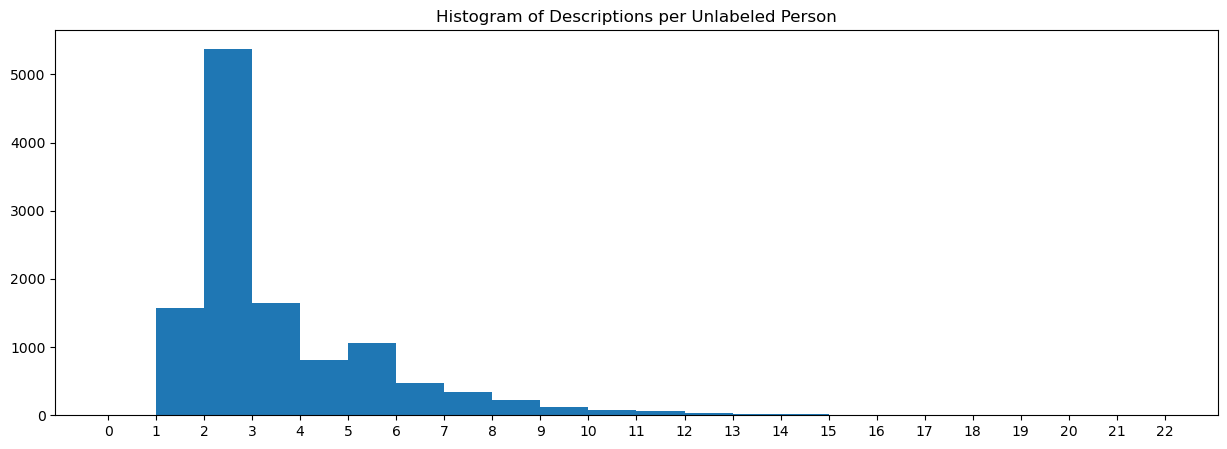

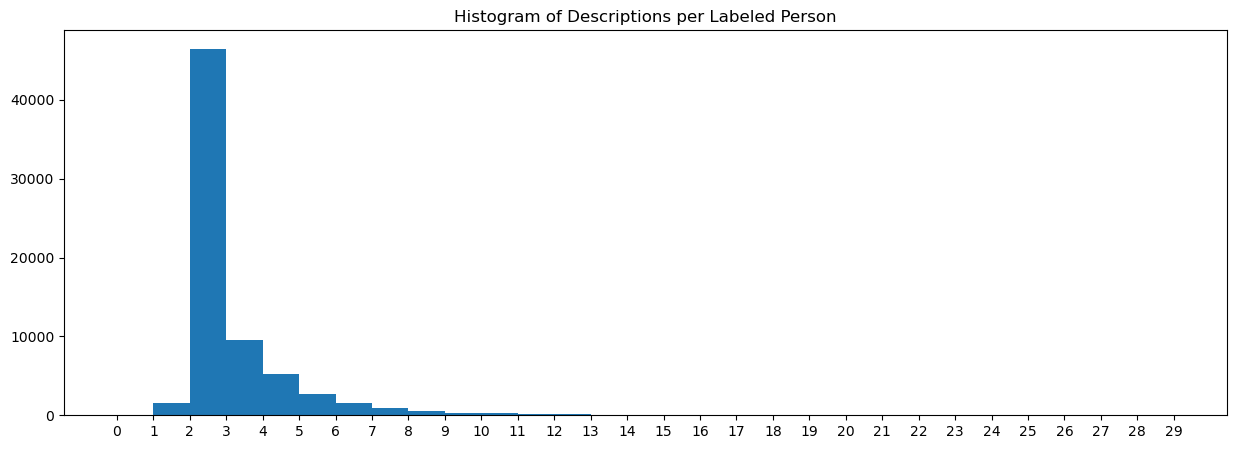

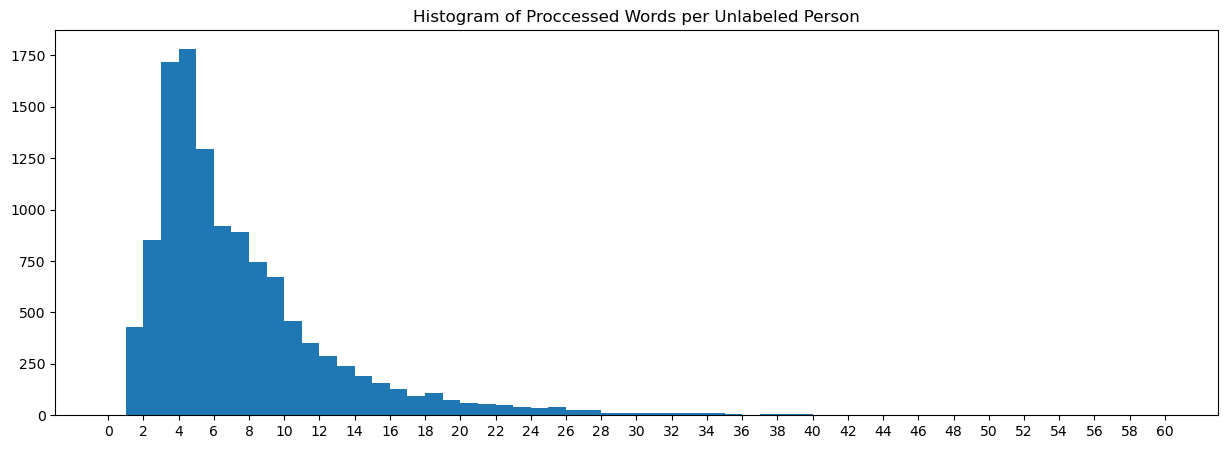

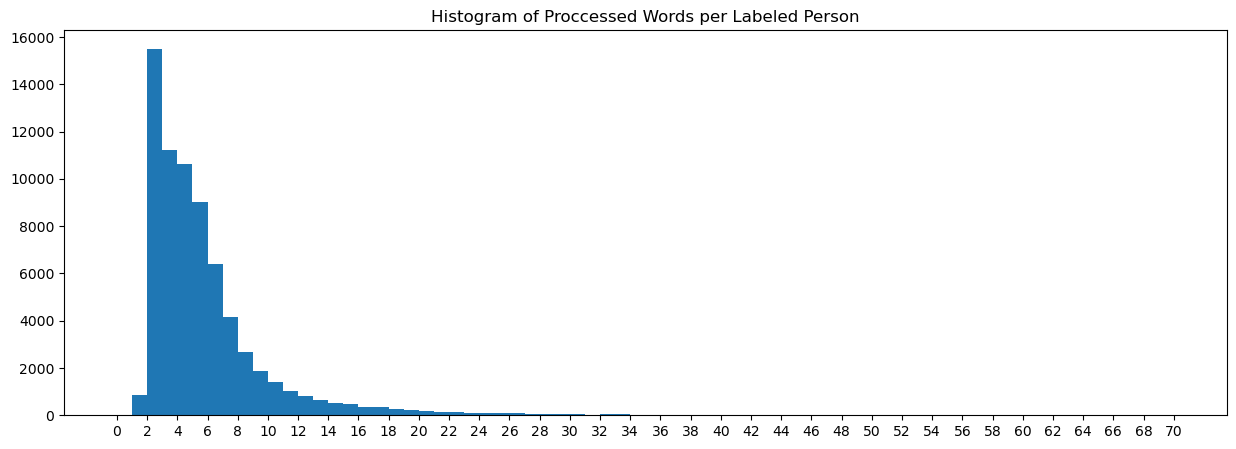

In [23]:
histogram(unlabeled.desc_count_ori, "Descriptions per Unlabeled Person")
histogram(df[df.is_labeled].desc_count_ori, "Descriptions per Labeled Person")
histogram(unlabeled.desc_count, "Proccessed Words per Unlabeled Person")
histogram(df[df.is_labeled].desc_count, "Proccessed Words per Labeled Person")

In [24]:
bag_of_words.sum().sort_values(ascending=False)

kandidát        16835
ex              15818
odborník        11387
obec            11323
sport            9604
                ...  
nanopharma          1
nanoprogress        1
nanoroboty          1
nanostříbra         1
ˇyďár               1
Length: 28010, dtype: int64

In [25]:
bag_of_words[df.is_labeled].sum().sort_values(ascending=False).head(30)

odborník      11387
sport          9603
umělec         8756
kultura        7329
ex             7244
byznys         7179
kandidát       6725
mluvčí         5710
ředitel        5517
reg            5255
zpr            5251
obec           5226
spolek         4671
starosta       4572
akademik       3734
zastupitel     3733
vedoucí        3644
zdravotník     3523
úředník        3357
novinář        3204
český          2674
ředitelka      2257
předseda       2166
poslanec       1858
social         1819
ido            1766
om             1765
ozbrojenec     1749
trenér         1492
čr             1485
dtype: int64

In [26]:
unlabeled_bag = bag_of_words[~df.is_labeled]
unlabeled_bag.sum().sort_values(ascending=False).head(30)

kandidát         10110
ex                8574
obec              6097
zastupitel        5190
poslanec          4819
reg               2923
zpr               2922
místostarosta     1097
ředitel            870
město              817
kraj               782
starostka          659
krajský            622
ods                483
učitel             476
kdu                475
čsl                472
radní              452
předseda           444
anec               437
vedoucí            409
čssd               407
manažer            367
český              361
náměstek           357
osvč               334
podnikatel         310
obecní             307
ředitelka          306
technik            294
dtype: int64

In [27]:
unlabeled_bag.sum()[unlabeled_bag.sum() > 1].sort_values(ascending=False)

kandidát      10110
ex             8574
obec           6097
zastupitel     5190
poslanec       4819
              ...  
hlasový           2
pěvkyně           2
pěstounka         2
pěnčín            2
academy           2
Length: 3468, dtype: int64

In [28]:
unlabeled_bag.loc[:,unlabeled_bag.sum() == 1]

,aaabyty,absolvent,ac,acb,aceh,adamov,addotours,adelaide,adiktoložka,administr,...,žlutice,žo,žokej,žondry,žonglér,žs,župa,žákovou,žďárku,žďársku
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
unlabeled_bag_good_info = unlabeled_bag.loc[:, unlabeled_bag.sum() > 1]

In [30]:
from scipy.sparse import csr_matrix

data_matrix = csr_matrix(unlabeled_bag_good_info.sparse.to_coo())

In [31]:
from sklearn.cluster import KMeans

def kmean_explore(data, max_clusters: int) -> list:
    scores = []
    
    for i in range(2, max_clusters+1):
        km = KMeans(n_clusters=i, n_init=10)
        km.fit(data_matrix)
        score = km.score(data_matrix)
        scores.append(np.abs(score))
    return scores

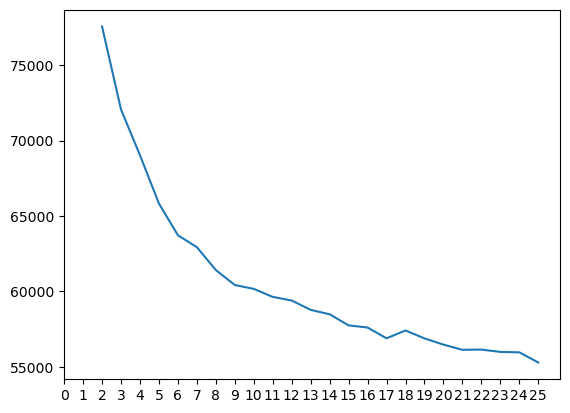

CPU times: user 1min 17s, sys: 5.13 s, total: 1min 22s
Wall time: 21.5 s


In [32]:
%%time
max_cluster = 25
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.xticks(list(range(26)))
plt.show()

In [33]:
km = KMeans(n_clusters=8, n_init=10)

predictions = km.fit_predict(data_matrix)

In [34]:
for a in set(predictions):
    print(a)
    display(unlabeled_bag[predictions == a].loc[:, unlabeled_bag.columns!='predictions'].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0


ex               4623
kandidát         3448
obec             3137
zastupitel       1651
ods               320
poslanec          291
čssd              219
místostarosta     214
ředitel           146
stan              144
město             143
ksčm              116
manažer           109
starostka         102
osvč               88
technik            87
pirát              83
podnikatel         82
primátor           81
radní              78
dtype: int64





1


místostarosta     320
starostka         296
učitel            266
zastupitel        187
ředitel           152
ředitelka         114
kandidát          100
právník            97
místostarostka     91
radní              82
zš                 80
vedoucí            80
ido                79
om                 79
obec               77
škola              68
město              61
český              60
předseda           55
zastupitelka       52
dtype: int64





2


kandidát       3366
poslanec       3317
osvč            179
podnikatel      142
město           140
zastupitel      137
technik         130
ředitel         116
anec            111
manažer         110
důchodce        109
živnostník      106
vedoucí          96
předseda         95
společnost       95
pedagog          92
pracovník        83
ex               83
obec             73
specialista      73
dtype: int64





3


reg          2682
zpr          2682
ředitel       307
český         161
předseda      138
plzeň         125
bývalý        121
čr             98
vedoucí        93
fakulta        93
trenér         90
ředitelka      82
poslanec       82
brno           80
anec           80
kraj           69
město          64
ústav          60
sdružení       60
odbor          58
dtype: int64





4


ex                1181
kandidát           853
obec               794
zastupitel         405
kdu                400
čsl                400
poslanec            56
místostarosta       34
technik             31
starostka           30
vedoucí             29
ředitel             27
učitel              22
osvč                21
město               19
lékař               18
místostarostka      15
pracovník           15
jednatel            14
zemědělec           13
dtype: int64





5


zastupitel       1001
ex                774
kandidát          660
obec              498
kraj              290
krajský           251
poslanec          206
obecní            185
ksčm               84
radní              66
čssd               65
náměstek           64
město              63
reg                55
zpr                55
primátor           52
místostarosta      50
anec               50
hejtman            40
ods                37
dtype: int64





6


kandidát         1564
ex               1268
obec              847
poslanec          763
zastupitel        537
město             261
místostarosta     216
anec              138
radní              81
ředitel            75
ksčm               68
náměstek           61
primátor           60
ods                57
starostka          56
čssd               51
reg                48
zpr                48
kraj               47
čr                 46
dtype: int64





7


zastupitel        1259
obec               659
ex                 590
kraj               263
krajský            207
místostarosta      201
starostka          107
kandidát            87
poslanec            80
obecní              73
radní               72
město               66
zpr                 58
reg                 58
náměstek            45
místostarostka      42
zastupitelka        35
předseda            30
ústí                27
primátor            26
dtype: int64